In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cleaning_data.csv')
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Cpu_speed,Cpu_mark,Memory_GB,Memory_kind,Price
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,2.3,Intel,128.0,SSD,71378.6832
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,1.8,Intel,128.0,Flash,47895.5232
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,2.5,Intel,256.0,SSD,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2.7,Intel,512.0,SSD,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,3.1,Intel,256.0,SSD,96095.8080


In [3]:
print(data.describe().T)
# data['ScreenResolution'] = data['Cpu_speed'].astype("category")
# data['Gpu'] = data['Gpu'].astype("category")
# print(data.info())

            count          mean           std        min       25%       50%  \
Inches     1271.0     15.132258      1.954530    10.1000     14.00     15.60   
Ram        1271.0      8.463415      5.568758     1.0000      4.00      8.00   
Weight     1271.0      2.077852      0.808083     0.0002      1.50      2.04   
Cpu_speed  1271.0      2.298914      0.507129     0.9000      2.00      2.50   
Memory_GB  1271.0    448.210858    366.893638     0.0000    256.00    256.00   
Price      1271.0  59888.473922  37309.185217  9270.7200  31914.72  52054.56   

                  75%        max  
Inches        15.6000      35.60  
Ram            8.0000      64.00  
Weight         2.3200      11.10  
Cpu_speed      2.7000       3.60  
Memory_GB    512.0000    2048.00  
Price      79274.2464  324954.72  


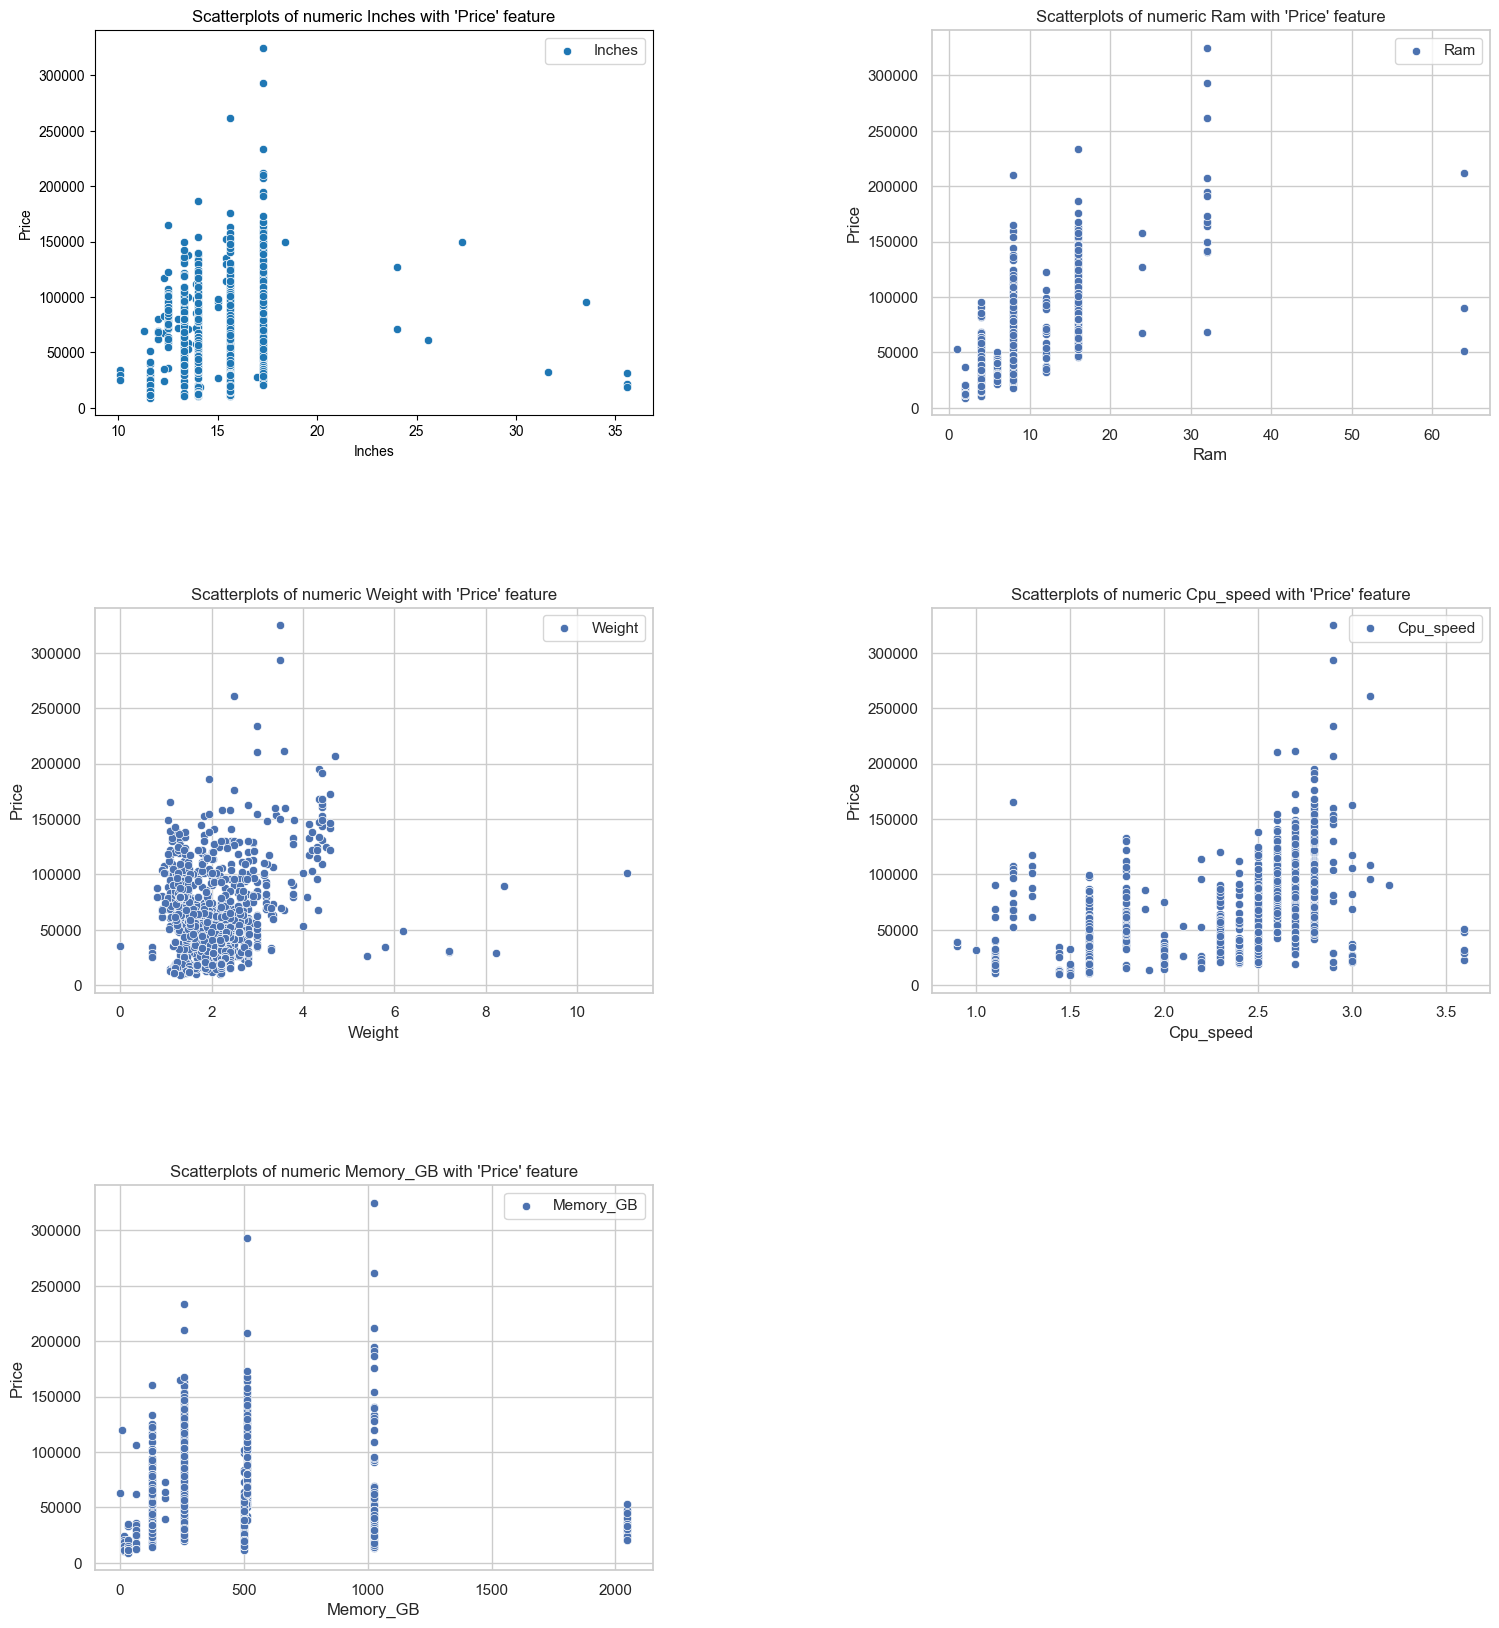

In [4]:
plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'Cpu_speed', 'Memory_GB']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.scatterplot(x=cols, y='Price', data=data, label=cols)
    plt.ylabel('Price')
    plt.title(f"Scatterplots of numeric {cols} with 'Price' feature")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23152\1460065563.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols])
C:\Users\Dell\AppData\Local\Temp\ipykernel_23152\1460065563.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols])
C:\Users\Dell\AppData\Local\Temp\ipykernel_23152

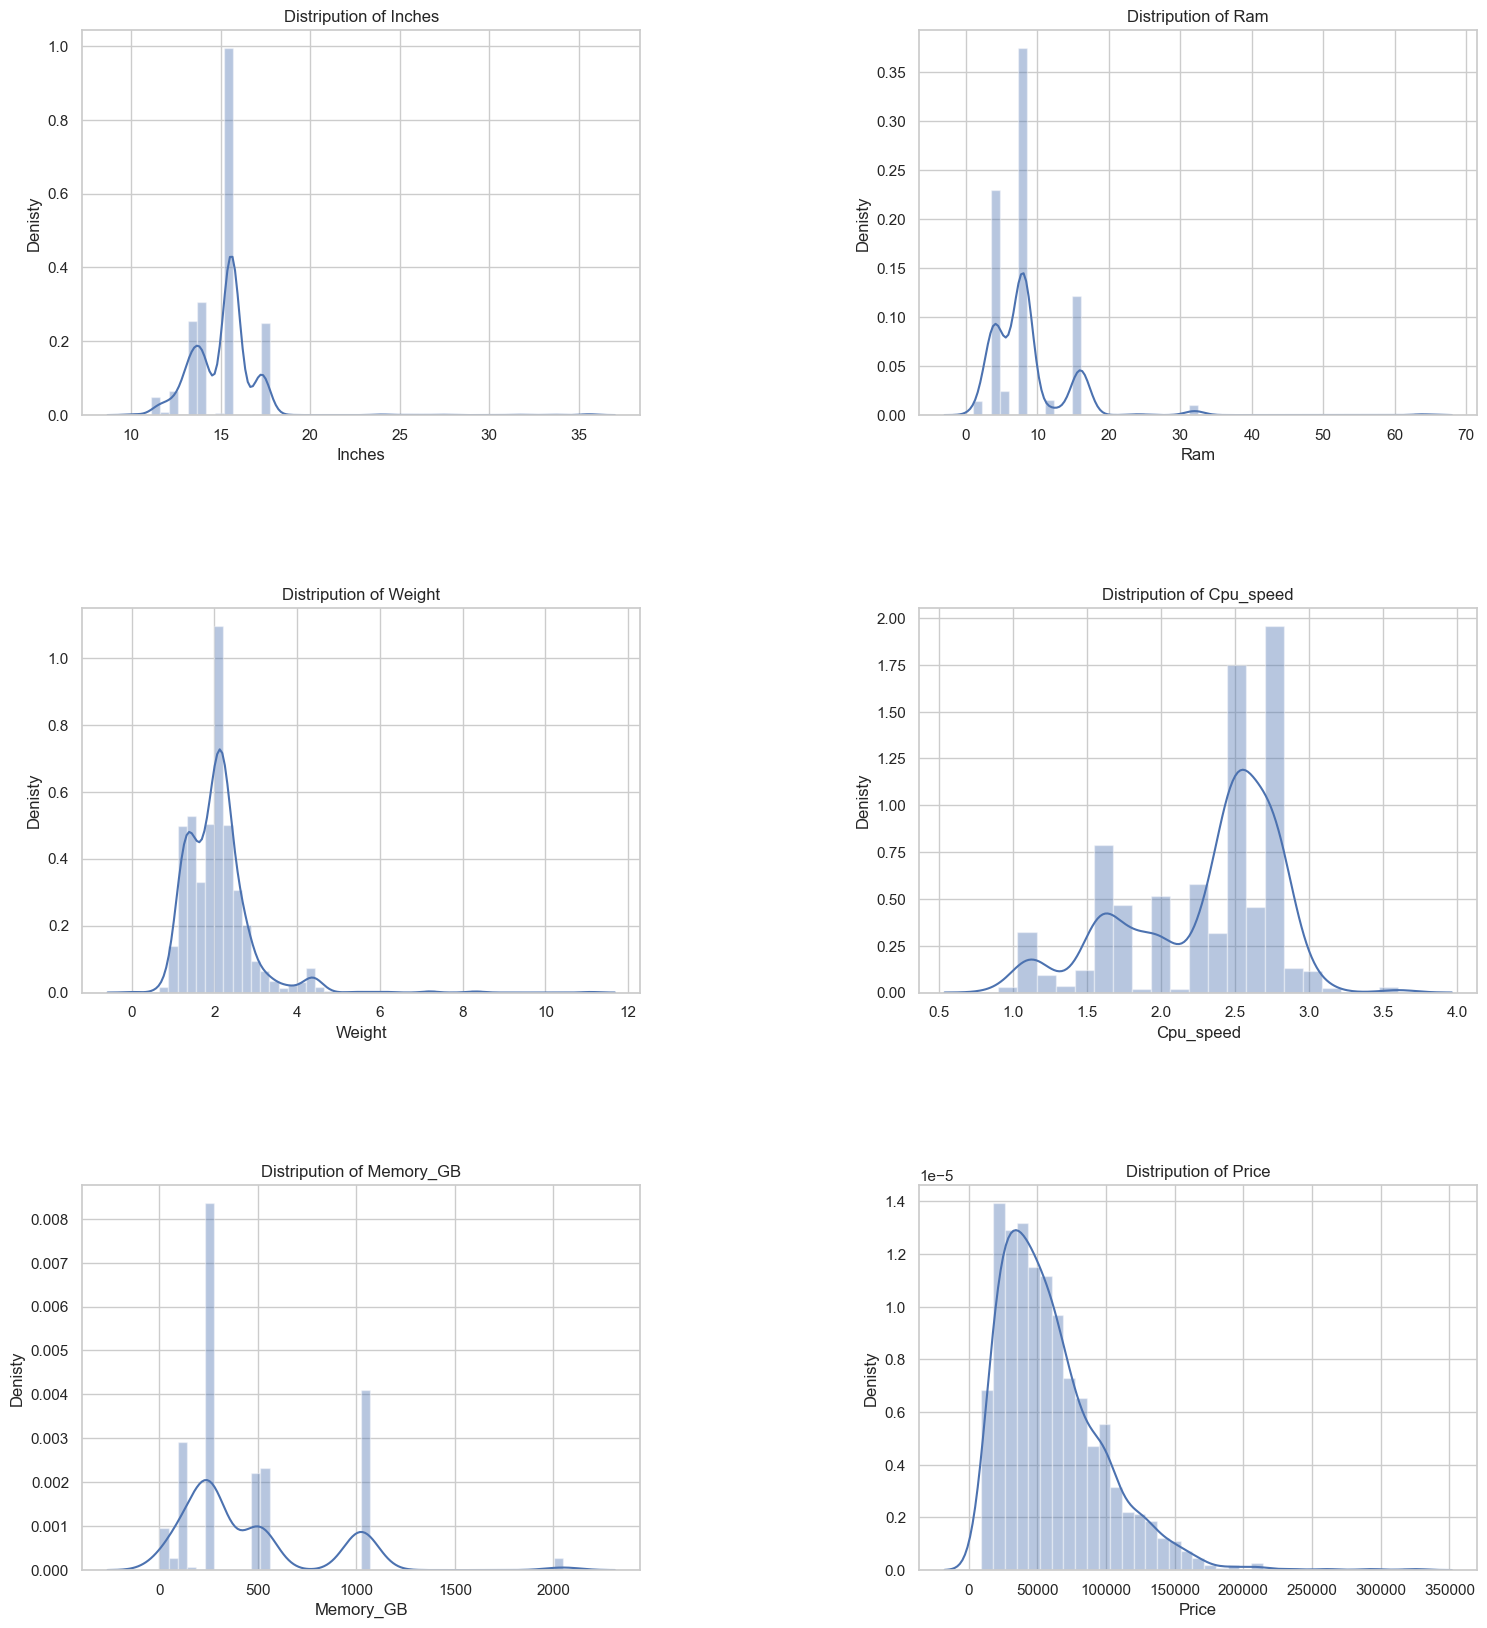

In [5]:
plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'Cpu_speed', 'Memory_GB', 'Price']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[cols])
    plt.ylabel('Denisty')
    plt.title(f"Distripution of {cols}")
plt.show()

C:\Users\Dell\Documents\osobiste\baza\project_ds\project_ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Documents\osobiste\baza\project_ds\project_ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Documents\osobiste\baza\project_ds\project_ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Documents\osobiste\baza\project_ds\project_ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


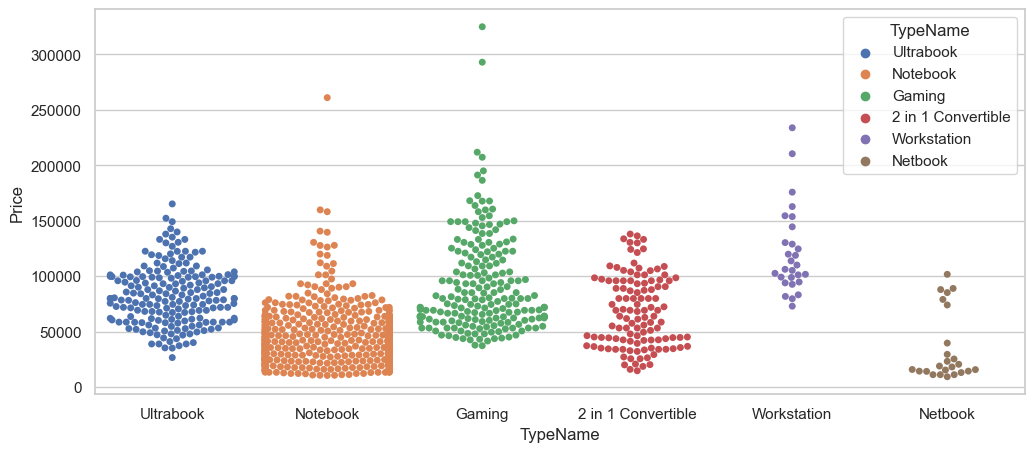

In [7]:
plt.figure(figsize=(12,5))
sns.swarmplot(data=data,x=data['TypeName'],y=data['Price'],hue=data['TypeName'])
plt.show()

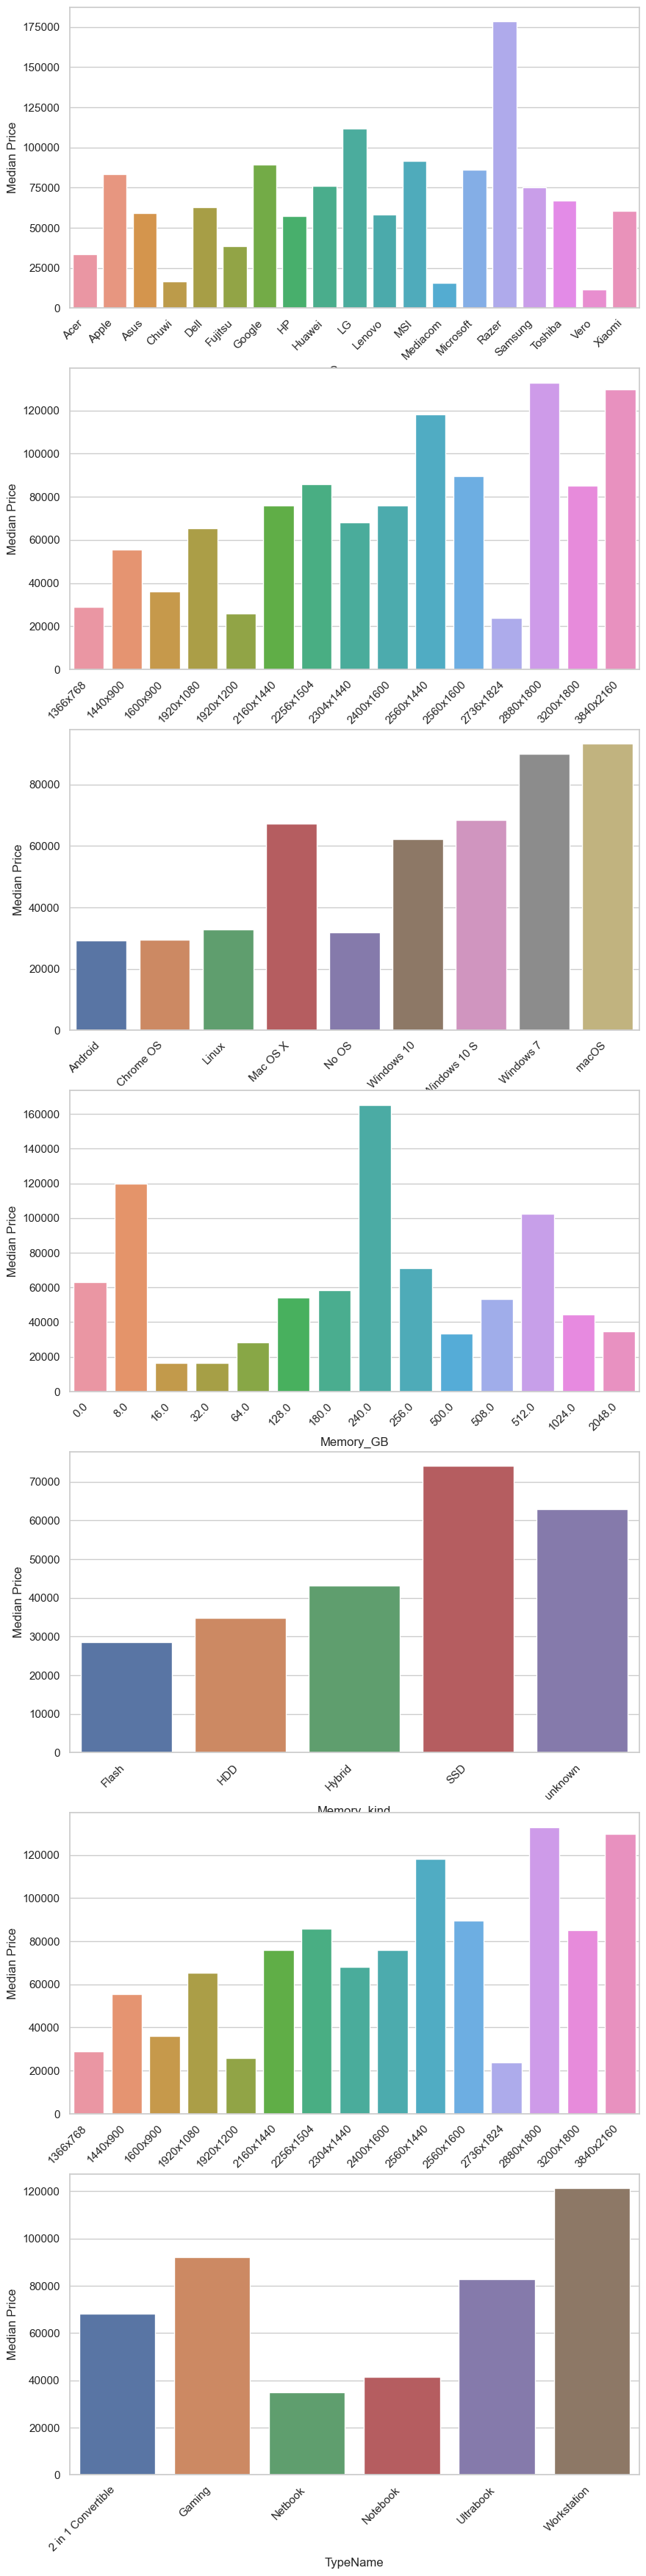

In [28]:
plt.figure(1, figsize=(10,50))
categorical_features = ['Company', 'ScreenResolution', 'OpSys', 'Memory_GB', 'Memory_kind', 'TypeName']
n=0
for col in categorical_features:
    n += 1
    plt.subplot(8, 1, n)
    df_grouped = data.groupby(col)['Price'].mean().reset_index()
    sns.barplot(x=col, y="Price", data=df_grouped)
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Median Price")
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# usówami 'Weight', 'Inches', 'ScreenResolution', 'TypeName'

column_names = ['Company', 'ScreenResolution', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Memory_GB', 'Memory_kind']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'ScreenResolution', 'Gpu', 'OpSys', 'Memory_GB', 'Memory_kind']
numeric_features = ['Ram', 'Cpu_speed']

# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])
# X_cat = categorical_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')

Model score: 0.8013922511175811


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# usówami 'Weight', 'Inches', 'ScreenResolution', 'TypeName'

column_names = ['Company', 'TypeName', 'Weight', 'ScreenResolution', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Memory_GB', 'Memory_kind']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'OpSys', 'Memory_GB', 'Memory_kind']
numeric_features = ['Ram', 'Cpu_speed']
# 'Inches', 'Weight'
# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])
# X_cat = categorical_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Błąd średniokwadratowy (MSE): {:.2f}".format(mse))

Model score: 0.8131481584156213
Błąd średniokwadratowy (MSE): 269112291.49


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# usówami 'Weight', 'Inches', 'ScreenResolution', 'TypeName'

column_names = ['Company', 'TypeName', 'Weight', 'ScreenResolution', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Memory_GB', 'Memory_kind']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'OpSys', 'Memory_GB', 'Memory_kind']
numeric_features = ['Ram', 'Cpu_speed', 'Inches', 'Weight']

# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])
# X_cat = categorical_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Błąd średniokwadratowy (MSE): {:.2f}".format(mse))

Model score: -0.06397837033969389
Błąd średniokwadratowy (MSE): 1532388735.99
